In [1]:
# load in dataset

from google.colab import files
import pandas as pd

uploaded_cleaned = files.upload()

file = list(uploaded_cleaned.keys())[0]

df = pd.read_csv(file, encoding='ISO-8859-1')
df.head()

Saving cleaned_merged_tracks.csv to cleaned_merged_tracks.csv


,album_title,album_release_date,track_genre_top,track_listens
0,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,1293
1,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,514
2,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,1151
3,Constant Hitmaker,2008-02-06 00:00:00,Pop,50135
4,AWOL - A Way Of Life,2009-01-05 00:00:00,Hip-Hop,943


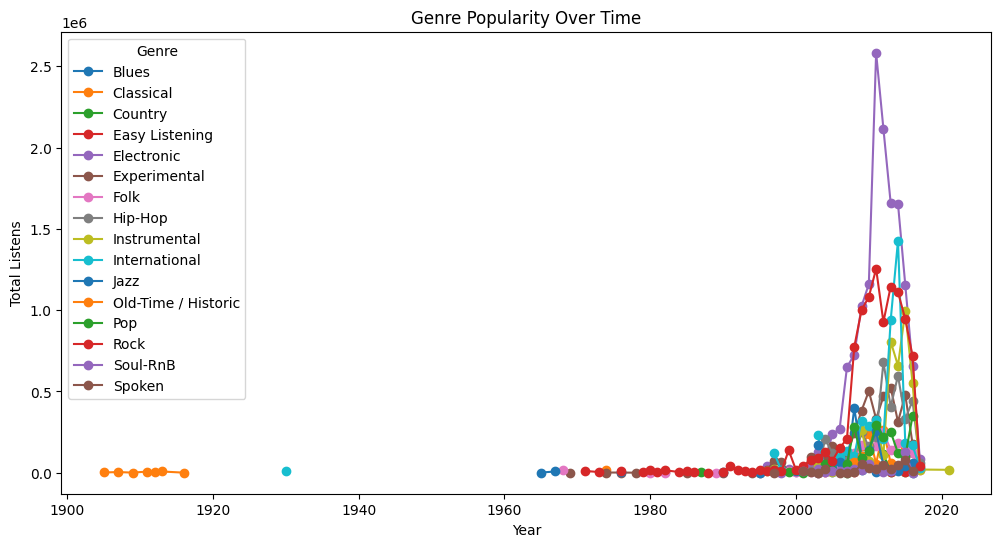

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df["album_release_date"] = pd.to_datetime(df["album_release_date"])
df["year"] = df["album_release_date"].dt.year

# Group by genre and year
genre_trends = df.groupby(["year", "track_genre_top"])["track_listens"].sum().unstack()

# Plot trends
genre_trends.plot(kind="line", figsize=(12, 6), marker="o")
plt.title("Genre Popularity Over Time")
plt.ylabel("Total Listens")
plt.xlabel("Year")
plt.legend(title="Genre")
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwtfqjta/dgor5e0h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbwtfqjta/ct8tl084.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30850', 'data', 'file=/tmp/tmpbwtfqjta/dgor5e0h.json', 'init=/tmp/tmpbwtfqjta/ct8tl084.json', 'output', 'file=/tmp/tmpbwtfqjta/prophet_modelr1_86fmg/prophet_model-20250322001314.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:13:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:13:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:

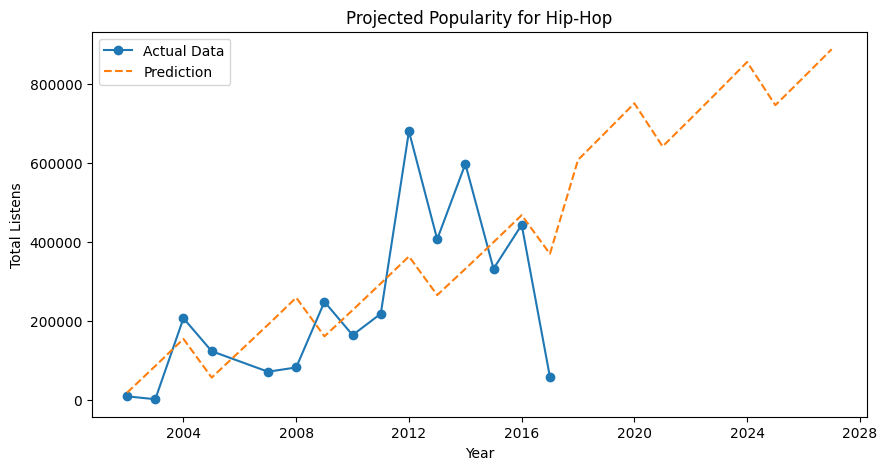

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
# Prepare data
df["album_release_date"] = pd.to_datetime(df["album_release_date"])
df["year"] = df["album_release_date"].dt.year

# Group by year and genre
genre_trends = df.groupby(["year", "track_genre_top"])["track_listens"].sum().reset_index()

# Filter for selected genre
selected_genre = "Hip-Hop"
genre_data = genre_trends[genre_trends["track_genre_top"] == selected_genre]

# Format for Prophet
genre_data = genre_data.rename(columns={"track_listens": "y"})
genre_data["ds"] = pd.to_datetime(genre_data["year"], format="%Y")

# Fit model
model = Prophet()
model.fit(genre_data[["ds", "y"]])

# Forecast
future = model.make_future_dataframe(periods=10, freq='Y')
forecast = model.predict(future)

# Plot
plt.figure(figsize=(10, 5))
plt.title(f"Projected Popularity for {selected_genre}")
plt.xlabel("Year")
plt.ylabel("Total Listens")
plt.plot(genre_data["ds"], genre_data["y"], label="Actual Data", marker="o")
plt.plot(forecast["ds"], forecast["yhat"], label="Prediction", linestyle="dashed")
plt.legend()
plt.show()


<ipython-input-2-05d898c9e48a>:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(all_genres))
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/jk2dn7ez.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/e_i3jle5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73327', 'data', 'file=/tmp/tmptc0_xgy3/jk2dn7ez.json', 'init=/tmp/tmptc0_xgy3/e_i3jle5.j

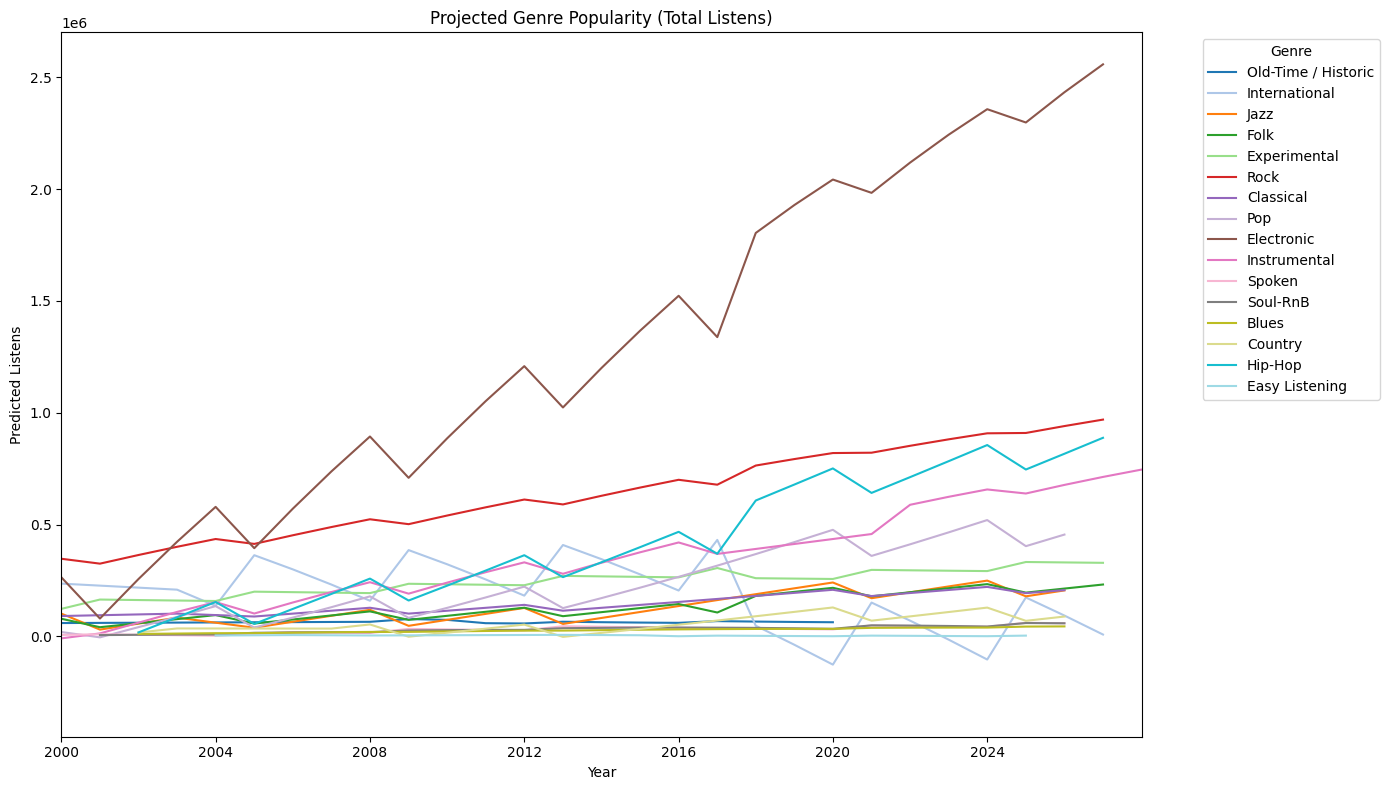

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load and prepare your dataset
df["album_release_date"] = pd.to_datetime(df["album_release_date"])
df["year"] = df["album_release_date"].dt.year

# Group by year and genre
genre_trends = df.groupby(["year", "track_genre_top"])["track_listens"].sum().reset_index()

# Get list of genres
all_genres = genre_trends["track_genre_top"].unique()

# Set up a plot
plt.figure(figsize=(14, 8))
colors = plt.cm.get_cmap('tab20', len(all_genres))

# Loop through each genre and forecast
for i, genre in enumerate(all_genres):
    genre_data = genre_trends[genre_trends["track_genre_top"] == genre].copy()
    genre_data = genre_data.rename(columns={"track_listens": "y"})
    genre_data["ds"] = pd.to_datetime(genre_data["year"], format="%Y")

    # Avoid errors on too-short time series
    if len(genre_data) >= 5:  # Prophet needs enough data
        model = Prophet()
        model.fit(genre_data[["ds", "y"]])

        future = model.make_future_dataframe(periods=10, freq="Y")
        forecast = model.predict(future)

        # Plot the predicted values
        plt.plot(forecast["ds"], forecast["yhat"], label=genre, color=colors(i))

# Plot formatting
plt.title("Projected Genre Popularity (Total Listens)")
plt.xlabel("Year")
plt.ylabel("Predicted Listens")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlim(pd.Timestamp("2000-01-01"), pd.Timestamp("2027-12-31"))

plt.show()


<ipython-input-3-0e67f0aec8c5>:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(all_genres))
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/aewdkuqy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/caeadgb2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22004', 'data', 'file=/tmp/tmptc0_xgy3/aewdkuqy.json', 'init=/tmp/tmptc0_xgy3/caeadgb2.j

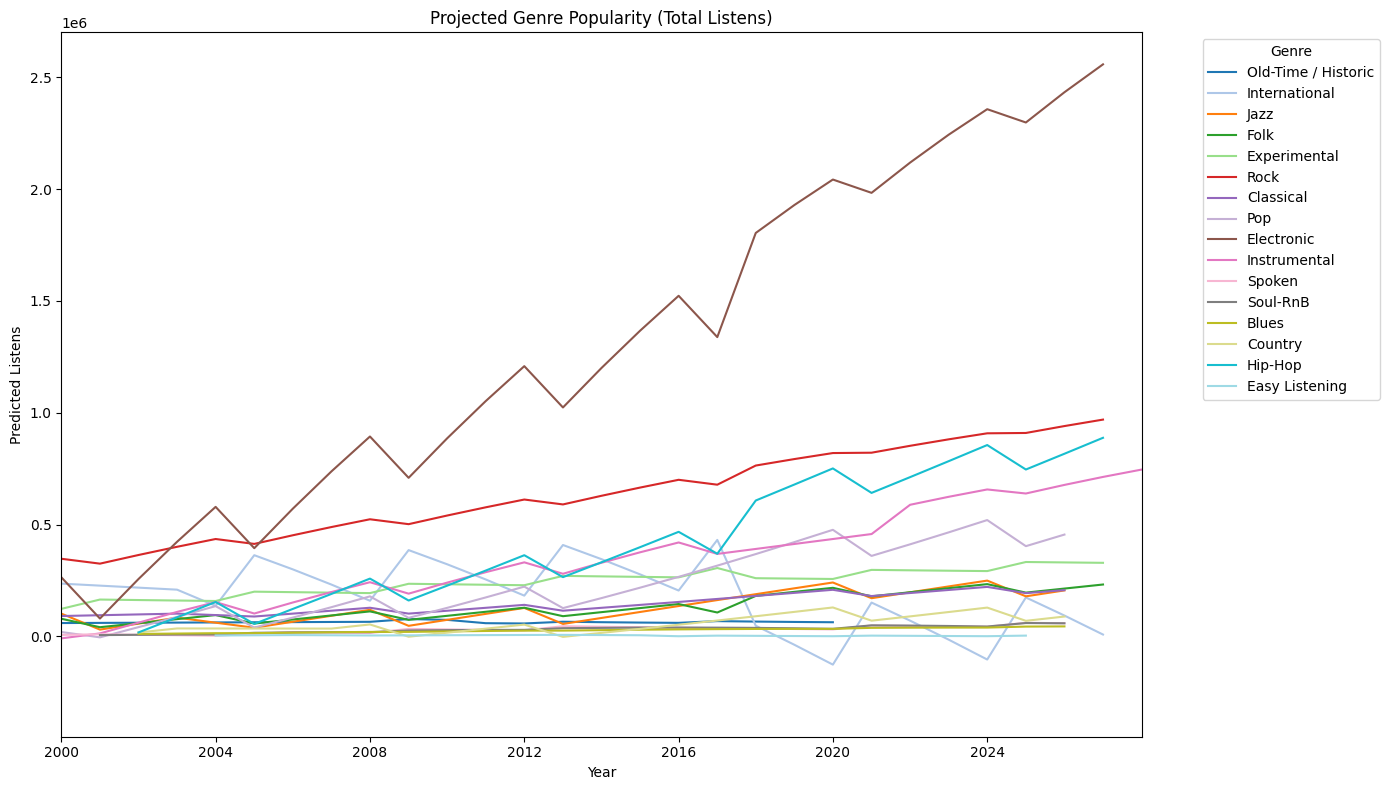

Top 3 Predicted Genres for 2026:
        genre  predicted_listens
4  Electronic       2.558519e+06
3        Rock       9.694999e+05
6     Hip-Hop       8.880776e+05


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from datetime import datetime

# Load and prepare your dataset
df["album_release_date"] = pd.to_datetime(df["album_release_date"])
df["year"] = df["album_release_date"].dt.year

# Group by year and genre
genre_trends = df.groupby(["year", "track_genre_top"])["track_listens"].sum().reset_index()

# Get list of genres
all_genres = genre_trends["track_genre_top"].unique()

# For storing predictions
future_predictions = []
target_year = datetime.now().year + 1  # Change this to a specific year like 2026 if needed

# Set up a plot
plt.figure(figsize=(14, 8))
colors = plt.cm.get_cmap('tab20', len(all_genres))

# Loop through each genre and forecast
for i, genre in enumerate(all_genres):
    genre_data = genre_trends[genre_trends["track_genre_top"] == genre].copy()
    genre_data = genre_data.rename(columns={"track_listens": "y"})
    genre_data["ds"] = pd.to_datetime(genre_data["year"], format="%Y")
    genre_data = genre_data.sort_values("ds")

    if len(genre_data) >= 5:  # Ensure enough data for Prophet
        try:
            model = Prophet()
            model.fit(genre_data[["ds", "y"]])

            future = model.make_future_dataframe(periods=10, freq="Y")
            forecast = model.predict(future)

            # Plot the predicted values
            plt.plot(forecast["ds"], forecast["yhat"], label=genre, color=colors(i))

            # Store prediction for target year
            predicted_row = forecast[forecast["ds"].dt.year == target_year]
            if not predicted_row.empty:
                yhat_value = predicted_row.iloc[0]["yhat"]
                future_predictions.append({"genre": genre, "predicted_listens": yhat_value})
        except Exception as e:
            print(f"Skipping genre {genre} due to error: {e}")

# Plot formatting
plt.title("Projected Genre Popularity (Total Listens)")
plt.xlabel("Year")
plt.ylabel("Predicted Listens")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xlim(pd.Timestamp("2000-01-01"), pd.Timestamp("2027-12-31"))

plt.show()

# Create DataFrame of predictions and show top 3
predictions_df = pd.DataFrame(future_predictions)
top_3_genres = predictions_df.sort_values("predicted_listens", ascending=False).head(3)

print(f"Top 3 Predicted Genres for {target_year}:")
print(top_3_genres)


In [11]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Prep dataset
df["album_release_date"] = pd.to_datetime(df["album_release_date"])
df["year"] = df["album_release_date"].dt.year

# Group by year and genre
genre_trends = df.groupby(["year", "track_genre_top"])["track_listens"].sum().reset_index()

# All genres
all_genres = genre_trends["track_genre_top"].unique()
print(f"\n🎵 Total genres found: {len(all_genres)}\n")

# Accuracy results
accuracy_results = []

# Forecast target years
target_years = [2015, 2016, 2017]

for genre in all_genres:
    genre_data = genre_trends[genre_trends["track_genre_top"] == genre].copy()
    genre_data["ds"] = pd.to_datetime(genre_data["year"], format="%Y")
    genre_data = genre_data.rename(columns={"track_listens": "y"}).sort_values("ds")

    # Define training set (all years < 2015)
    train = genre_data[genre_data["ds"].dt.year < 2015]
    test = genre_data[genre_data["ds"].dt.year.isin(target_years)]

    print(f"▶️ {genre}: {len(train)} train years, {len(test)} test years")

    if len(train) < 3 or len(test) == 0:
        print(f"⛔ Skipping {genre} (not enough train/test data)\n")
        continue

    try:
        # Train model
        model = Prophet(yearly_seasonality=True)
        model.fit(train[["ds", "y"]])

        # Generate future years up to 2017
        last_train_year = train["ds"].dt.year.max()
        future_years_needed = 2017 - last_train_year
        future = model.make_future_dataframe(periods=future_years_needed, freq='Y')
        forecast = model.predict(future)

        # Extract only predictions for 2015–2017
        forecast["year"] = forecast["ds"].dt.year
        forecast_test = forecast[forecast["year"].isin(target_years)]

        # Merge forecast and actual
        merged = pd.merge(
            forecast_test[["year", "yhat"]],
            test[["year", "y"]],
            on="year",
            how="inner"
        )

        if merged.empty:
            print(f"⚠️ {genre} — no matching years after merge\n")
            continue

        # Calculate metrics
        mae = mean_absolute_error(merged["y"], merged["yhat"])
        rmse = np.sqrt(mean_squared_error(merged["y"], merged["yhat"]))
        mape = np.mean(np.abs((merged["y"] - merged["yhat"]) / merged["y"])) * 100

        accuracy_results.append({
            "genre": genre,
            "MAE": mae,
            "RMSE": rmse,
            "MAPE": mape
        })

        print(f"✅ {genre}: MAPE = {mape:.2f}%\n")

    except Exception as e:
        print(f"❌ Error processing {genre}: {e}\n")

# Final results
if accuracy_results:
    accuracy_df = pd.DataFrame(accuracy_results).sort_values("MAPE")
    print("\n📊 Forecast Accuracy by Genre:")
    print(accuracy_df.to_string(index=False))
else:
    print("❗ Still no genres had enough usable data — time to check the dataset ranges.")


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/i1tmu33h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/sjxo49at.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18206', 'data', 'file=/tmp/tmptc0_xgy3/i1tmu33h.json', 'init=/tmp/tmptc0_xgy3/sjxo49at.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_modelk8_hpvno/prophet_model-20250324175135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:51:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



🎵 Total genres found: 16

▶️ Old-Time / Historic: 10 train years, 0 test years
⛔ Skipping Old-Time / Historic (not enough train/test data)

▶️ International: 15 train years, 3 test years


17:51:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/19aqg1_y.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/x_p18u1x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35001', 'data', 'file=/tmp/tmptc0_xgy3/19aqg1_y.json', 'init=/tmp/tmptc0_xgy3/x_p18u1x.json', 'output', 'fil

✅ International: MAPE = 126.45%

▶️ Jazz: 19 train years, 2 test years
✅ Jazz: MAPE = 443.37%

▶️ Folk: 21 train years, 3 test years


DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/2nnsswi6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73352', 'data', 'file=/tmp/tmptc0_xgy3/37gr3qm2.json', 'init=/tmp/tmptc0_xgy3/2nnsswi6.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_modelu6llllmy/prophet_model-20250324175135.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:51:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:proph

✅ Folk: MAPE = 20.19%

▶️ Experimental: 28 train years, 3 test years


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/0niixiys.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/1a25k5zy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60323', 'data', 'file=/tmp/tmptc0_xgy3/0niixiys.json', 'init=/tmp/tmptc0_xgy3/1a25k5zy.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_modelyfp2bydx/prophet_model-20250324175136.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:51:36 - cmdstanpy - INFO - Chain [1] sta

✅ Experimental: MAPE = 51.30%

▶️ Rock: 36 train years, 3 test years


17:51:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/st8bde3h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/07pi5eaq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86413', 'data', 'file=/tmp/tmptc0_xgy3/st8bde3h.json', 'init=/tmp/tmptc0_xgy3/07pi5eaq.json', 'output', 'file

✅ Rock: MAPE = 13.98%

▶️ Classical: 10 train years, 2 test years
✅ Classical: MAPE = 42.16%

▶️ Pop: 15 train years, 2 test years


17:51:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 14.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/50k_54zk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/s7q44w4k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53841', 'data', 'file=/tmp/tmptc0_xgy3/50k_54zk.json', 'init=/tmp/tmptc0_xgy3/s7q44w4k.json', 'output', 'fil

✅ Pop: MAPE = 153.27%

▶️ Electronic: 19 train years, 3 test years


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 11.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/q5o3ovjz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/rjejy0g7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4252', 'data', 'file=/tmp/tmptc0_xgy3/q5o3ovjz.json', 'init=/tmp/tmptc0_xgy3/rjejy0g7.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_modellvp9bxog/prophet_model-20250324175137.csv', 'method=optimize', 'al

✅ Electronic: MAPE = 194.61%

▶️ Instrumental: 15 train years, 3 test years


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 10.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/7vctu0u4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/259i33zb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78754', 'data', 'file=/tmp/tmptc0_xgy3/7vctu0u4.json', 'init=/tmp/tmptc0_xgy3/259i33zb.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_model3nnfxb65/prophet_model-20250324175137.csv', 'method=optimize', 'a

✅ Instrumental: MAPE = 57.29%

▶️ Spoken: 14 train years, 2 test years
✅ Spoken: MAPE = 191.60%

▶️ Soul-RnB: 12 train years, 2 test years


17:51:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/l54ilbzh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/wzhec09q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45420', 'data', 'file=/tmp/tmptc0_xgy3/l54ilbzh.json', 'init=/tmp/tmptc0_xgy3/wzhec09q.json', 'output', 'file

✅ Soul-RnB: MAPE = 1427.06%

▶️ Blues: 10 train years, 2 test years
✅ Blues: MAPE = 2204.60%

▶️ Country: 7 train years, 2 test years


INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/ga_3ahl4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/hhhp7mxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36395', 'data', 'file=/tmp/tmptc0_xgy3/ga_3ahl4.json', 'init=/tmp/tmptc0_xgy3/hhhp7mxp.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_modeljyg9vfrf/prophet_model-20

✅ Country: MAPE = 3765.50%

▶️ Hip-Hop: 12 train years, 3 test years
✅ Hip-Hop: MAPE = 92.13%

▶️ Easy Listening: 4 train years, 1 test years


DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/koqugyr_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/ow6u5_ht.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67497', 'data', 'file=/tmp/tmptc0_xgy3/koqugyr_.json', 'init=/tmp/tmptc0_xgy3/ow6u5_ht.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_modelu5afzups/prophet_model-20250324175138.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:51:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:51:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


✅ Easy Listening: MAPE = 130.13%


📊 Forecast Accuracy by Genre:
         genre          MAE         RMSE        MAPE
          Rock 1.313153e+05 1.819870e+05   13.984501
          Folk 2.774162e+04 2.942591e+04   20.193478
     Classical 5.804162e+04 5.804806e+04   42.161108
  Experimental 1.783096e+05 2.040267e+05   51.299599
  Instrumental 4.934328e+05 5.799139e+05   57.287675
       Hip-Hop 3.370906e+05 3.477990e+05   92.127660
 International 2.277946e+05 2.895551e+05  126.452215
Easy Listening 6.772022e+03 6.772022e+03  130.131087
           Pop 1.699915e+05 2.163505e+05  153.274558
        Spoken 3.945821e+04 4.066861e+04  191.595632
    Electronic 1.575504e+06 1.586870e+06  194.608925
          Jazz 1.993764e+05 2.072374e+05  443.372578
      Soul-RnB 6.469112e+04 7.973025e+04 1427.063020
         Blues 4.626861e+04 5.745665e+04 2204.600375
       Country 1.786480e+05 1.841505e+05 3765.496230


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/zx_u8i8x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptc0_xgy3/cw800llx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36972', 'data', 'file=/tmp/tmptc0_xgy3/zx_u8i8x.json', 'init=/tmp/tmptc0_xgy3/cw800llx.json', 'output', 'file=/tmp/tmptc0_xgy3/prophet_modelzumkze8x/prophet_model-20250324180101.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:01:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:01:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages

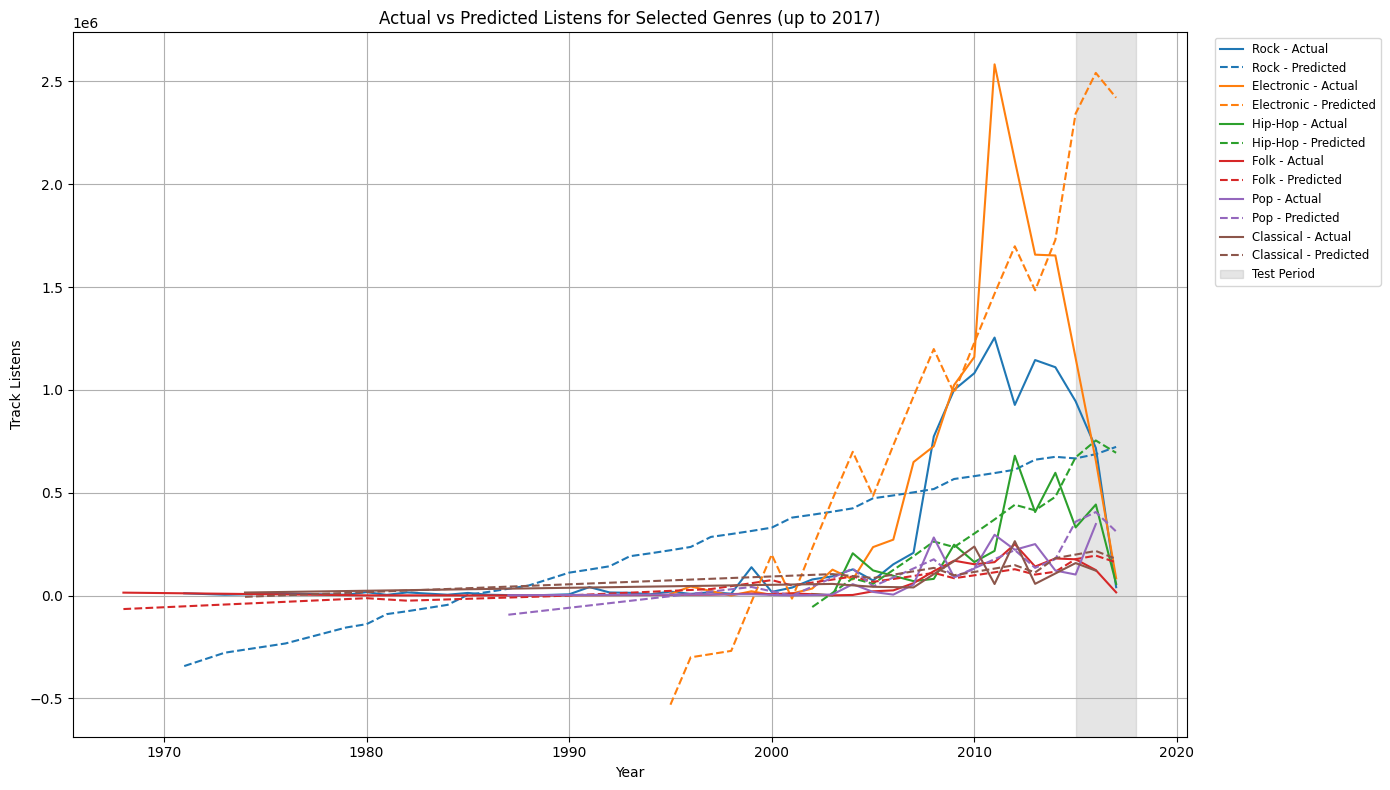

In [14]:
import matplotlib.pyplot as plt
from prophet import Prophet
import pandas as pd

# Genres to include
target_genres = ["Rock", "Electronic", "Hip-Hop", "Folk", "Pop", "Classical"]

# Plot setup
plt.figure(figsize=(14, 8))

# Colors and line styles
colors = plt.cm.tab10.colors
linestyles = ['-', '--']  # solid for actual, dashed for predicted

for i, genre in enumerate(target_genres):
    genre_data = genre_trends[genre_trends["track_genre_top"] == genre].copy()
    genre_data["ds"] = pd.to_datetime(genre_data["year"], format="%Y")
    genre_data = genre_data.rename(columns={"track_listens": "y"}).sort_values("ds")

    train = genre_data[genre_data["ds"].dt.year < 2015]
    test = genre_data[genre_data["ds"].dt.year.isin([2015, 2016, 2017])]

    if len(train) >= 3:
        try:
            model = Prophet(yearly_seasonality=True)
            model.fit(train[["ds", "y"]])

            last_train_year = train["ds"].dt.year.max()
            future_years_needed = 2017 - last_train_year
            future = model.make_future_dataframe(periods=future_years_needed, freq="Y")
            forecast = model.predict(future)

            # Actual
            plt.plot(genre_data["ds"], genre_data["y"],
                     label=f"{genre} - Actual", color=colors[i % 10], linestyle='-')

            # Predicted
            plt.plot(forecast["ds"], forecast["yhat"],
                     label=f"{genre} - Predicted", color=colors[i % 10], linestyle='--')

        except Exception as e:
            print(f"⚠️ Could not plot {genre}: {e}")
    else:
        print(f"⛔ Skipped {genre} (not enough training data)")

# Highlight test period
plt.axvspan(pd.Timestamp("2015-01-01"), pd.Timestamp("2017-12-31"), color='gray', alpha=0.2, label="Test Period")

# Formatting
plt.title("Actual vs Predicted Listens for Selected Genres (up to 2017)")
plt.xlabel("Year")
plt.ylabel("Track Listens")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1), fontsize='small')
plt.tight_layout()
plt.grid(True)
plt.show()

